<img src="files/spam_notspam_image.jpeg" alt="Drawing" style="width: 230px;"/>

# <center> Machine Learning project on email spam filter </center>


## Introduction <a id = "1" text goes here></a>

*__Aim of the project__* :  <br>
    To Build an email spam filter which marks the incoming emails of all employees as spam or non-spam.


*__Objective:__*
<ol>
    <li> To identify a maximum number of spam emails. <b> Implies : Higher True Positives</b> </li>
    <li> Maximum of 0.2% of all legitimate emails being classified incorrectly <b> Implies : False Positives $<$ 0.2%</b> </li>
    <li> To find what percentage of incoming spam emails will be identifed in the future. </li>
</ol>

In [1]:
import scipy.io
import scipy.sparse

import pandas as pd        
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

### Load and check the data <a id = "11" text goes here></a>

In [2]:
dataset = scipy.io.loadmat('emails.mat')
print(type(dataset),"\n")
print("There are ",len(dataset)," elements in the data provided.\n")

X = dataset["X"].T
y = dataset["Y"].T

print(X.shape)
print(y.shape)

<class 'dict'> 

There are  5  elements in the data provided.

(10000, 57173)
(10000, 1)


The items X, Y represent the features and labels respectively. <br>
Total number of emails is 10,000. <br>
Total number of words is 57,173. <br>

In [3]:
pd.DataFrame(X.toarray()).head()

,0,1,2,3,4,5,6,7,8,9,...,57163,57164,57165,57166,57167,57168,57169,57170,57171,57172
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Engineering / EDA <a id = "2" text goes here></a>

### Imbalanced Dataset? / Spam- not spam ratio <a id = "21" text goes here></a>


There are 1970 illegitimate and 8030 legitimate emails in the given dataset
Spam percentage     :  19.7
Not Spam percentage :  80.30000000000001


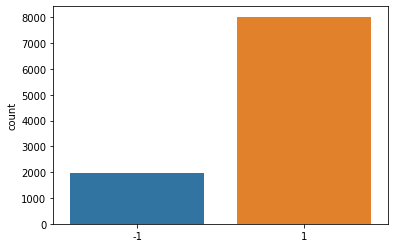

In [4]:
print("There are",np.count_nonzero(y==-1),"illegitimate and", np.count_nonzero(y==1),"legitimate emails in the given dataset") 

print("Spam percentage     : ",(np.count_nonzero(y==-1) / y.shape[0]) * 100)
print("Not Spam percentage : ",(np.count_nonzero(y==1) / y.shape[0]) * 100)

sns.countplot(x = y.ravel())

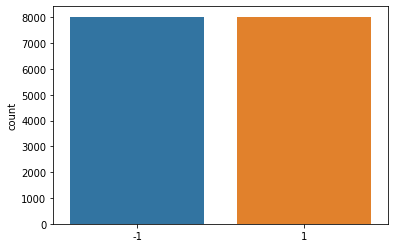

In [5]:
# To handle imbalanced dataset
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler(random_state=5 ) #, ratio=0.5)
X_balanced, y_balanced = os.fit_sample(X, y)

sns.countplot(x = y_balanced.ravel())

## Prediction <a id = "3" text goes here></a>

### Split into training and testing set <a id = "31" text goes here></a>

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(X_balanced, y_balanced, test_size = 0.20, random_state = 5)

### Build the model <a id = "32" text goes here></a>


#### Logistic Regression(Linear Classification)<a id = "321" text goes here></a>


Accuracy of the model is :  99.75 %


Confusion Matrix : 
 [[ 368    5]
 [   0 1627]]

 True Positive Rate :  1.0

 False Positive Rate :  0.013404825737265416


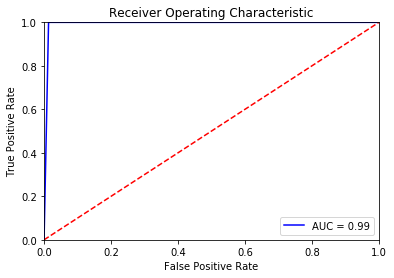

In [7]:
# 1. Train the model 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)


# 2. Prediction
y_pred = model.predict(X_test)


# 3. Evaluate
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
true_positive_rate = tp / (tp + fn)

print("Accuracy of the model is : ", round(accuracy_score(y_test, y_pred)*100,2),"%\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n True Positive Rate : ",true_positive_rate ) 
print("\n False Positive Rate : ",false_positive_rate )

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy of the model is :  99.88 %


Confusion Matrix : 
 [[1613    0]
 [   4 1595]]

 True Positive Rate :  0.9974984365228268

 False Positive Rate :  0.0


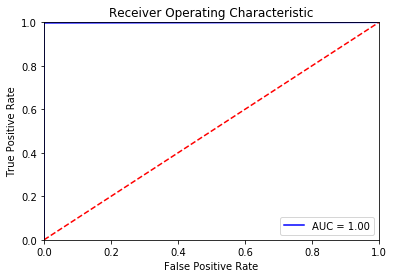

In [8]:
# Now consider the balanced dataset

# 1. Model building and Training
model = LogisticRegression()
model.fit(X_bal_train,y_bal_train)

# 2. Prediction
y_pred = model.predict(X_bal_test)

# 3. Evaluate
tn, fp, fn, tp = confusion_matrix(y_bal_test, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
true_positive_rate = tp / (tp + fn)

print("Accuracy of the model is : ", round(accuracy_score(y_bal_test, y_pred)*100,2),"%\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_bal_test, y_pred))
print("\n True Positive Rate : ",true_positive_rate ) 
print("\n False Positive Rate : ",false_positive_rate )

fpr, tpr, threshold = roc_curve(y_bal_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [9]:
# Cross validation on actual dataset
from sklearn.model_selection import cross_val_score

print("\n---- Cross validation on actual dataset---\n ")
score = cross_val_score(model, X, y, cv = 10)
print(score)
print("\n Average :",round(score.mean() *100, 2))

# Cross validation on balanced dataset
print("\n---- Cross validation on balanced dataset---\n ")
score = cross_val_score(model, X_balanced, y_balanced, cv = 10)
print(score)
print("\n Average :",round(score.mean() *100, 2))


---- Cross validation on actual dataset---
 
[0.987 0.993 0.993 0.996 0.998 0.997 0.995 0.998 0.992 0.996]

 Average : 99.45

---- Cross validation on balanced dataset---
 
[0.99315068 0.99501868 0.99937733 0.99875467 0.99937733 1.
 1.         1.         0.99750934 0.99875467]

 Average : 99.82


#### Decision Tree<a id = "322" text goes here></a>


Accuracy of the model is :  99.55 %


Confusion Matrix : 
 [[ 368    5]
 [   4 1623]]

 True Positive Rate :  0.9975414874001229

 False Positive Rate :  0.013404825737265416


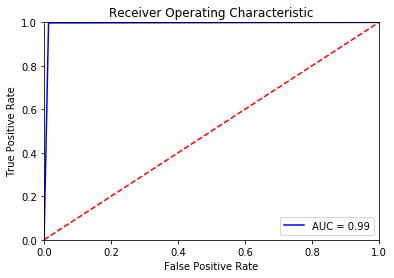

In [24]:
from sklearn import tree

# 1. Model build and training
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

# 2. Prediction
y_pred = model.predict(X_test)

# 3. Evaluate
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
true_positive_rate = tp / (tp + fn)

print("Accuracy of the model is : ", round(accuracy_score(y_test, y_pred)*100,2),"%\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n True Positive Rate : ",true_positive_rate ) 
print("\n False Positive Rate : ",false_positive_rate )

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[Text(581.9288321167884, 534.2275862068966, 'X[25322] <= 0.5\ngini = 0.32\nsamples = 8000\nvalue = [1597, 6403]'),
 Text(455.1569343065694, 515.4827586206897, 'X[31570] <= 0.5\ngini = 0.193\nsamples = 6802\nvalue = [734, 6068]'),
 Text(391.007299270073, 496.73793103448276, 'X[25620] <= 1.5\ngini = 0.116\nsamples = 6436\nvalue = [397, 6039]'),
 Text(360.4598540145986, 477.99310344827586, 'X[53446] <= 0.5\ngini = 0.079\nsamples = 6274\nvalue = [257, 6017]'),
 Text(348.2408759124088, 459.24827586206897, 'X[14473] <= 0.5\ngini = 0.053\nsamples = 6186\nvalue = [169, 6017]'),
 Text(336.021897810219, 440.50344827586207, 'X[23349] <= 0.5\ngini = 0.039\nsamples = 6138\nvalue = [121, 6017]'),
 Text(311.5839416058394, 421.7586206896552, 'X[2296] <= 0.5\ngini = 0.028\nsamples = 6094\nvalue = [85, 6009]'),
 Text(299.3649635036497, 403.0137931034483, 'X[7021] <= 0.5\ngini = 0.021\nsamples = 6072\nvalue = [63, 6009]'),
 Text(287.1459854014599, 384.2689655172414, 'X[32647] <= 0.5\ngini = 0.017\nsample

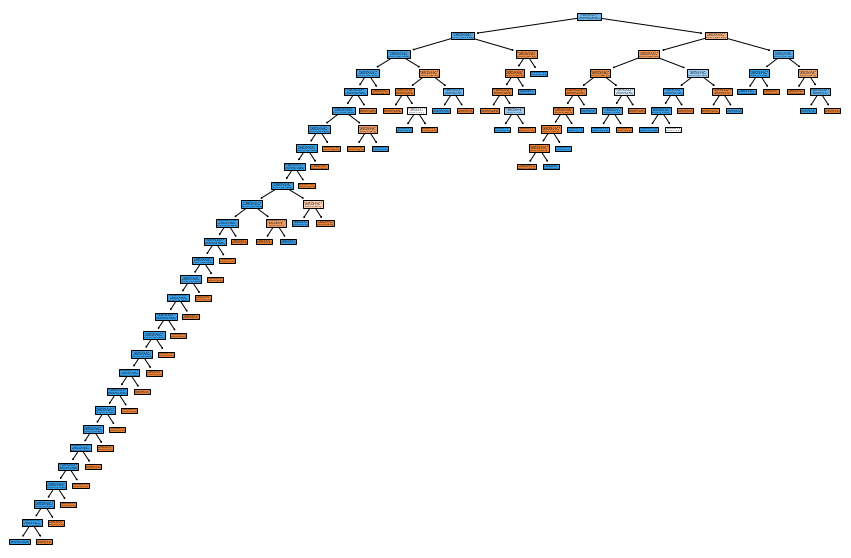

In [25]:
# The Tree!
plt.figure(figsize = (15,10))
tree.plot_tree(model, filled = True)

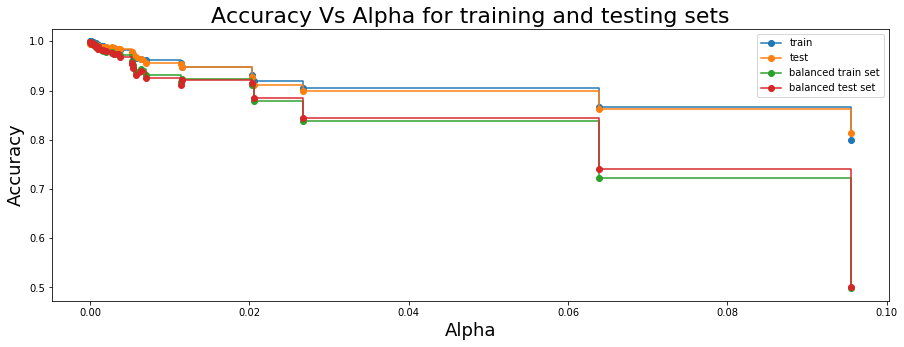

In [32]:
# lets perform pruning (Hyperparameter)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

print(ccp_alphas)

models = []
for ccp_alpha in ccp_alphas:
    model = tree.DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha )
    model.fit(X_train, y_train)
    models.append(model)
    
train_scores = [model.score(X_train,y_train) for model in models]
test_scores = [model.score(X_test,y_test) for model in models]
bal_test_scores = [model.score(X_bal_train,y_bal_train) for model in models]
bal_train_scores = [model.score(X_bal_test,y_bal_test) for model in models]

fig, ax = plt.subplots(figsize = (15,5))
ax.set_xlabel("Alpha", fontsize=18)
ax.set_ylabel("Accuracy", fontsize=18)
ax.set_title("Accuracy Vs Alpha for training and testing sets", fontsize=22)
ax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle ="steps-post" )
ax.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle ="steps-post" )
ax.plot(ccp_alphas, bal_train_scores, marker = 'o', label = "balanced train set", drawstyle ="steps-post" )
ax.plot(ccp_alphas, bal_test_scores, marker = 'o', label = "balanced test set", drawstyle ="steps-post" )

ax.legend()
plt.show()


Accuracy of the model is :  99.0 %


Confusion Matrix : 
 [[ 365    8]
 [  12 1615]]

 True Positive Rate :  0.9926244622003688

 False Positive Rate :  0.021447721179624665


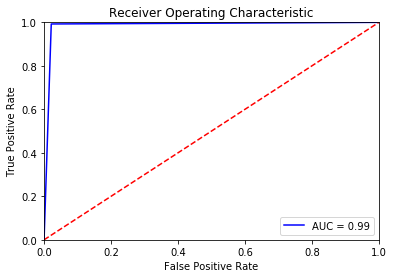

In [21]:
# Build new model with tuned parameters 

# 1. Model build and training
model1 = tree.DecisionTreeClassifier(random_state = 0, ccp_alpha = 0.001)
model1.fit(X_train,y_train)

# 2. Prediction
y_pred = model1.predict(X_test)

# 3. Evaluate
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
true_positive_rate = tp / (tp + fn)

print("Accuracy of the model is : ", round(accuracy_score(y_test, y_pred)*100,2),"%\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n True Positive Rate : ",true_positive_rate ) 
print("\n False Positive Rate : ",false_positive_rate )

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[Text(546.75, 520.95, 'X[25322] <= 0.5\ngini = 0.32\nsamples = 8000\nvalue = [1597, 6403]'),
 Text(391.5, 475.65000000000003, 'X[31570] <= 0.5\ngini = 0.193\nsamples = 6802\nvalue = [734, 6068]'),
 Text(324.0, 430.35, 'X[25620] <= 1.5\ngini = 0.116\nsamples = 6436\nvalue = [397, 6039]'),
 Text(270.0, 385.05, 'X[53446] <= 0.5\ngini = 0.079\nsamples = 6274\nvalue = [257, 6017]'),
 Text(243.0, 339.75, 'X[14473] <= 0.5\ngini = 0.053\nsamples = 6186\nvalue = [169, 6017]'),
 Text(216.0, 294.45, 'X[23349] <= 0.5\ngini = 0.039\nsamples = 6138\nvalue = [121, 6017]'),
 Text(162.0, 249.14999999999998, 'X[2296] <= 0.5\ngini = 0.028\nsamples = 6094\nvalue = [85, 6009]'),
 Text(135.0, 203.84999999999997, 'X[7021] <= 0.5\ngini = 0.021\nsamples = 6072\nvalue = [63, 6009]'),
 Text(108.0, 158.55, 'X[32647] <= 0.5\ngini = 0.017\nsamples = 6060\nvalue = [51, 6009]'),
 Text(81.0, 113.25, 'X[35764] <= 0.5\ngini = 0.013\nsamples = 6049\nvalue = [40, 6009]'),
 Text(54.0, 67.94999999999999, 'X[48806] <= 7.5\ng

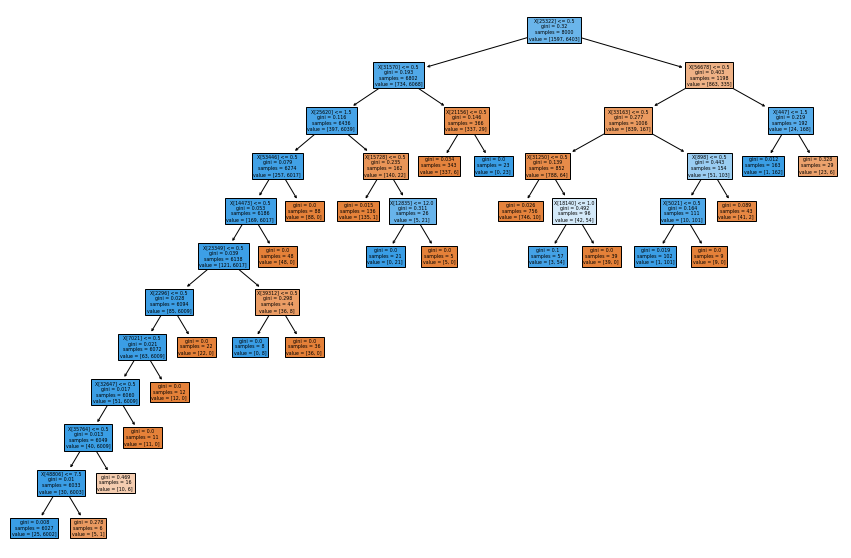

In [22]:
# The Tree!
plt.figure(figsize = (15,10))
tree.plot_tree(model1, filled = True)

#### Random Forest<a id = "323" text goes here></a>


Accuracy of the model is :  99.6 %


Confusion Matrix : 
 [[ 367    6]
 [   2 1625]]

 True Positive Rate :  0.9987707437000615

 False Positive Rate :  0.0160857908847185


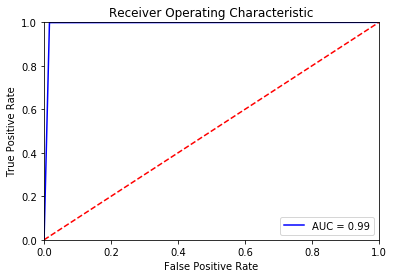

In [15]:
# 1. Model build and training
from sklearn.ensemble import RandomForestClassifier

model =  RandomForestClassifier()
model.fit(X_train,y_train)

# 2. predict
y_pred = model.predict(X_test)

# 3. Evaluate
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
true_positive_rate = tp / (tp + fn)

print("Accuracy of the model is : ", round(accuracy_score(y_test, y_pred)*100,2),"%\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n True Positive Rate : ",true_positive_rate ) 
print("\n False Positive Rate : ",false_positive_rate )

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
params = { "n_estimators" : [20, 10, 5, 50] , 
            "criterion" : ["entropy", "gini"] }

# Hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier()
random_search = RandomizedSearchCV(model, param_distributions = params, n_iter = 5,  scoring = 'roc_auc',  n_jobs = None, verbose = 3, cv =5 )
random_search.fit(X,y)

random_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=5, criterion=entropy ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... n_estimators=5, criterion=entropy, score=0.998, total=   0.6s
[CV] n_estimators=5, criterion=entropy ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ... n_estimators=5, criterion=entropy, score=0.999, total=   0.6s
[CV] n_estimators=5, criterion=entropy ...............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] ... n_estimators=5, criterion=entropy, score=0.999, total=   0.5s
[CV] n_estimators=5, criterion=entropy ...............................
[CV] ... n_estimators=5, criterion=entropy, score=0.999, total=   0.6s
[CV] n_estimators=5, criterion=entropy ...............................
[CV] ... n_estimators=5, criterion=entropy, score=0.995, total=   0.6s
[CV] n_estimators=10, criterion=gini .................................
[CV] ..... n_estimators=10, criterion=gini, score=0.997, total=   1.0s
[CV] n_estimators=10, criterion=gini .................................
[CV] ..... n_estimators=10, criterion=gini, score=0.999, total=   0.9s
[CV] n_estimators=10, criterion=gini .................................
[CV] ..... n_estimators=10, criterion=gini, score=0.997, total=   0.9s
[CV] n_estimators=10, criterion=gini .................................
[CV] ..... n_estimators=10, criterion=gini, score=0.999, total=   1.0s
[CV] n_estimators=10, criterion=gini .................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   24.9s finished


RandomForestClassifier(criterion='entropy', n_estimators=20)

Accuracy of the model is :  99.6 %


Confusion Matrix : 
 [[ 368    5]
 [   3 1624]]

 True Positive Rate :  0.9981561155500922

 False Positive Rate :  0.013404825737265416


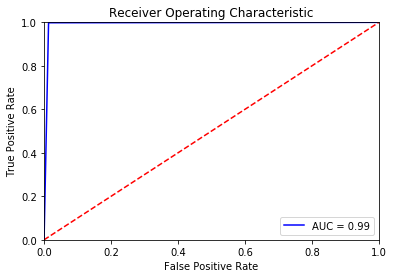

In [17]:
# New model with tuned hyperparameters and CV
from sklearn.ensemble import RandomForestClassifier

# 1. Model build and train
model =  RandomForestClassifier(n_estimators = 50, criterion = "entropy")
model.fit(X_train,y_train)

# 2. prediction
y_pred = model.predict(X_test)

# 3. Evaluate
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
true_positive_rate = tp / (tp + fn)

print("Accuracy of the model is : ", round(accuracy_score(y_test, y_pred)*100,2),"%\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n True Positive Rate : ",true_positive_rate ) 
print("\n False Positive Rate : ",false_positive_rate )

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Support Vector Classifier<a id = "324" text goes here></a>
 

Accuracy of the model is :  99.55 %


Confusion Matrix : 
 [[ 367    6]
 [   3 1624]]

 True Positive Rate :  0.9981561155500922

 False Positive Rate :  0.0160857908847185


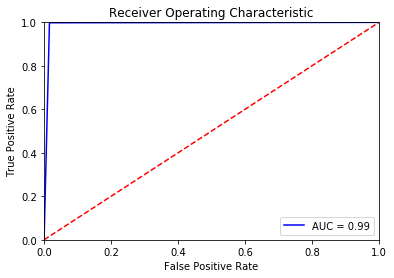

In [18]:
from sklearn.svm import LinearSVC

# 1. model build and train
model =  LinearSVC()
model.fit(X_train,y_train)

# 2. Prediction
y_pred = model.predict(X_test)


# 3. Evaluate
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
true_positive_rate = tp / (tp + fn)

print("Accuracy of the model is : ", round(accuracy_score(y_test, y_pred)*100,2),"%\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n True Positive Rate : ",true_positive_rate ) 
print("\n False Positive Rate : ",false_positive_rate )

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
params = { "penalty" : ['l1','l2'],
           "loss" : ['squared_hinge', 'hinge'],
           "C" : [0.1, 1.0, 2, 10]}

# Hyper parameter tuning
model = LinearSVC()
random_search = RandomizedSearchCV(model, param_distributions = params, n_iter = 5,  scoring = 'roc_auc', 
                                   n_jobs = None, verbose = 3, cv =5 )
random_search.fit(X,y)

random_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] penalty=l1, loss=squared_hinge, C=1.0 ...........................
[CV] . penalty=l1, loss=squared_hinge, C=1.0, score=nan, total=   0.1s
[CV] penalty=l1, loss=squared_hinge, C=1.0 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] . penalty=l1, loss=squared_hinge, C=1.0, score=nan, total=   0.1s
[CV] penalty=l1, loss=squared_hinge, C=1.0 ...........................
[CV] . penalty=l1, loss=squared_hinge, C=1.0, score=nan, total=   0.1s
[CV] penalty=l1, loss=squared_hinge, C=1.0 ...........................
[CV] . penalty=l1, loss=squared_hinge, C=1.0, score=nan, total=   0.1s
[CV] penalty=l1, loss=squared_hinge, C=1.0 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] . penalty=l1, loss=squared_hinge, C=1.0, score=nan, total=   0.1s
[CV] penalty=l1, loss=squared_hinge, C=2 .............................
[CV] ... penalty=l1, loss=squared_hinge, C=2, score=nan, total=   0.1s
[CV] penalty=l1, loss=squared_hinge, C=2 .............................
[CV] ... penalty=l1, loss=squared_hinge, C=2, score=nan, total=   0.1s
[CV] penalty=l1, loss=squared_hinge, C=2 .............................
[CV] ... penalty=l1, loss=squared_hinge, C=2, score=nan, total=   0.1s
[CV] penalty=l1, loss=squared_hinge, C=2 .............................
[CV] ... penalty=l1, loss=squared_hinge, C=2, score=nan, total=   0.1s
[CV] penalty=l1, loss=squared_hinge, C=2 .............................
[CV] ... penalty=l1, loss=squared_hinge, C=2, score=nan, total=   0.1s
[CV] penalty=l2, loss=hinge, C=0.1 ...................................
[CV] ....... penalty=l2, loss=hinge, C=0.1, score=0.996, total=   0.7s
[CV] penalty=l2, loss=hinge, C=0.1 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    9.6s finished


LinearSVC(C=0.1, loss='hinge')

In [33]:
#Hyper parameter tuning
from sklearn.svm import LinearSVC

# 1. model build and train
model =  LinearSVC(C=2, loss='hinge')
model.fit(X_train,y_train)

# 2. Predict
y_pred = model.predict(X_test)

# 3. Evaluate
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
true_positive_rate = tp / (tp + fn)

print("Accuracy of the model is : ", round(accuracy_score(y_test, y_pred)*100,2),"%\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n True Positive Rate : ",true_positive_rate ) 
print("\n False Positive Rate : ",false_positive_rate )

Accuracy of the model is :  99.55 %


Confusion Matrix : 
 [[ 367    6]
 [   3 1624]]

 True Positive Rate :  0.9981561155500922

 False Positive Rate :  0.0160857908847185


In [34]:
# Kernlized svm
from sklearn.svm import SVC

model =  SVC(kernel = "rbf", C = 10)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# 3. Evaluate
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
true_positive_rate = tp / (tp + fn)

print("Accuracy of the model is : ", round(accuracy_score(y_test, y_pred)*100,2),"%\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n True Positive Rate : ",true_positive_rate ) 
print("\n False Positive Rate : ",false_positive_rate )

Accuracy of the model is :  99.35 %


Confusion Matrix : 
 [[ 364    9]
 [   4 1623]]

 True Positive Rate :  0.9975414874001229

 False Positive Rate :  0.024128686327077747


#### Neural Network<a id = "325" text goes here></a>


In [45]:
# 1. Model build and train
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout            # Hyper parameter

# ANN initialization
model = Sequential()
# Add Input layer and first hidden layer
model.add(Dense(output_dim = 2000, init = "he_uniform", activation = "relu", input_dim = X.shape[1]))
model.add(Dropout(0.3))

# Add second hidden layer
model.add(Dense(output_dim = 1000, init = "he_uniform", activation = "relu"))
model.add(Dropout(0.4))

# Add third hidden layer
model.add(Dense(output_dim = 500, init = "he_uniform", activation = "relu"))
model.add(Dropout(0.2))

# Add fourth hidden layer
model.add(Dense(output_dim = 200, init = "he_uniform", activation = "relu"))
model.add(Dropout(0.2))

# Add fifth hidden layer
model.add(Dense(output_dim = 100, init = "he_uniform", activation = "relu"))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(output_dim = 1, init = "glorot_uniform", activation = "sigmoid"))

model.compile(optimizer = "Adamax", loss = "binary_crossentropy" , metrics = ["accuracy"])

#fit ANN to training set
model_history = model.fit(X_train, y_train, validation_split = 0.30, batch_size = 1000, nb_epoch = 10)

print(model_history.history.keys())


# 2. Predict
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


# 3. Evaluate
print("Accuracy of the model is : ", round(accuracy_score(y_test, y_pred)*100,2),"%\n\n")

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 5600 samples, validate on 2400 samples
Epoch 1/10
5600/5600 [==============================] - 58s 10ms/step - loss: -0.7168 - accuracy: 0.5002 - val_loss: -2.7689 - val_accuracy: 0.7904
Epoch 2/10
5600/5600 [==============================] - 52s 9ms/step - loss: -3.1422 - accuracy: 0.7848 - val_loss: -2.8810 - val_accuracy: 0.8021
Epoch 3/10
5600/5600 [==============================] - 53s 10ms/step - loss: -3.2243 - accuracy: 0.7932 - val_loss: -2.9142 - val_accuracy: 0.8087
Epoch 4/10
5600/5600 [==============================] - 53s 10ms/step - loss: -3.2431 - accuracy: 0.7946 - val_loss: -2.9139 - val_accuracy: 0.8092
Epoch 5/10
5600/5600 [==============================] - 54s 10ms/step - loss: -3.2463 - accuracy: 0.7943 - val_loss: -2.9143 - val_accuracy: 0.8092
Epoch 6/10
5600/5600 [==============================] - 53s 9ms/step - loss: -3.2427 - accura

#### Naive Bayes<a id = "326" text goes here></a>

In [35]:
from sklearn.naive_bayes import MultinomialNB

# 1. Model build and train
model = MultinomialNB()           # create a model
model.fit(X_train,y_train)        # train the model

# 2. Predict
y_pred = model.predict(X_test)    # test the model

# 3. Evaluate
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
true_positive_rate = tp / (tp + fn)

print("Accuracy of the model is : ", round(accuracy_score(y_test, y_pred)*100,2),"%\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n True Positive Rate : ",true_positive_rate ) 
print("\n False Positive Rate : ",false_positive_rate )

Accuracy of the model is :  97.9 %


Confusion Matrix : 
 [[ 372    1]
 [  41 1586]]

 True Positive Rate :  0.97480024585126

 False Positive Rate :  0.002680965147453083


In [36]:
params = { "alpha" : [0, 0.5 , 1.0] }  # smoothing parameter
          
# Hyper parameter tuning
random_search = RandomizedSearchCV(model, param_distributions = params, n_iter = 5,  scoring = 'roc_auc', 
                                   n_jobs = None, verbose = 3, cv =5 )
random_search.fit(X,y)

random_search.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] alpha=0 .........................................................
[CV] ............................. alpha=0, score=0.998, total=   0.1s
[CV] alpha=0 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................. alpha=0, score=0.983, total=   0.1s
[CV] alpha=0 .........................................................
[CV] ............................. alpha=0, score=0.997, total=   0.1s
[CV] alpha=0 .........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ............................. alpha=0, score=0.999, total=   0.1s
[CV] alpha=0 .........................................................
[CV] ............................. alpha=0, score=0.997, total=   0.1s
[CV] alpha=0.5 .......................................................
[CV] ........................... alpha=0.5, score=0.994, total=   0.1s
[CV] alpha=0.5 .......................................................
[CV] ........................... alpha=0.5, score=0.975, total=   0.1s
[CV] alpha=0.5 .......................................................
[CV] ........................... alpha=0.5, score=0.998, total=   0.1s
[CV] alpha=0.5 .......................................................
[CV] ........................... alpha=0.5, score=1.000, total=   0.1s
[CV] alpha=0.5 .......................................................
[CV] ........................... alpha=0.5, score=0.994, total=   0.1s
[CV] alpha=1.0 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.7s finished


MultinomialNB(alpha=0)

In [39]:
random_search.best_params_

{'alpha': 0}

In [40]:
# Hyperparameter tuned model

# 1. model build and train
model = MultinomialNB(alpha=0)    
model.fit(X_train,y_train)        

# 2. Predict
y_pred = model.predict(X_test)  

# 3. Evaluate
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
true_positive_rate = tp / (tp + fn)

print("Accuracy of the model is : ", round(accuracy_score(y_test, y_pred)*100,2),"%\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("\n True Positive Rate : ",true_positive_rate ) 
print("\n False Positive Rate : ",false_positive_rate )

Accuracy of the model is :  99.6 %


Confusion Matrix : 
 [[ 372    1]
 [   7 1620]]

 True Positive Rate :  0.9956976029502151

 False Positive Rate :  0.002680965147453083


In [43]:
# Considering the balanced dataset
from sklearn.naive_bayes import MultinomialNB

# 1. Model build and train
model = MultinomialNB(alpha=0)         
model.fit(X_bal_train,y_bal_train)        

# 2. Predict
y_pred = model.predict(X_bal_test)    

# 3. Evaluate
tn, fp, fn, tp = confusion_matrix(y_bal_test, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
true_positive_rate = tp / (tp + fn)

print("Accuracy of the model is : ", round(accuracy_score(y_bal_test, y_pred)*100,2),"%\n\n")
print("Confusion Matrix : \n", confusion_matrix(y_bal_test, y_pred))
print("\n True Positive Rate : ",true_positive_rate ) 
print("\n False Positive Rate : ",false_positive_rate )

Accuracy of the model is :  99.75 %


Confusion Matrix : 
 [[1613    0]
 [   8 1591]]

 True Positive Rate :  0.9949968730456535

 False Positive Rate :  0.0


In [44]:
# Cross validation on actual dataset
from sklearn.model_selection import cross_val_score

print("\n---- Cross validation on actual dataset---\n ")
score = cross_val_score(model, X, y, cv = 10)
print(score)
print("\n Average :",round(score.mean() *100, 2))

# Cross validation on balanced dataset
print("\n---- Cross validation on balanced dataset---\n ")
score = cross_val_score(model, X_balanced, y_balanced, cv = 10)
print(score)
print("\n Average :",round(score.mean() *100, 2))


---- Cross validation on actual dataset---
 
[0.992 0.99  0.992 0.995 0.998 0.998 0.999 1.    0.992 0.993]

 Average : 99.49

---- Cross validation on balanced dataset---
 
[0.99439601 0.99377335 0.99501868 0.99564134 0.99937733 1.
 1.         1.         0.99252802 0.99626401]

 Average : 99.67


## Conclusion <a id = "4" text goes here></a>


| Sl.No. | Model | Accuracy (Ideal - 100%) |  TPR (Ideal - 1.0) | FPR (Ideal - 0.0)| CV Score (Ideal - 1.0) | Remark |
| :- | :- | :-: |:-: |:-: |:-: |-: |
| 1. | Logistic Regression | 99.75% | 1.0  | 0.0137 | 99.45% |
|    | Balanced Dataset    | 99.88% | 0.997  | 0.0 | 99.82% | Best |
| 2. | Decision Tree Classifier | 99.55% | 0.997 |0.134 |
|    | Post Tree Pruning | 99.0% | 0.992 |0.0214 | |Worst after pruning |
| 3. | Random Forest Classifier | 99.6% | 0.9987  | 0.016 |  |
|    | Post Hyperparameter tuning    | 99.6% | 0.9981  | 0.016 | |No effect on turing hyperparameter |
| 4. | Support Vector Classifier |  |   ||  |
|    | a. Linear SVC    | 99.55% | 0.9981 | 0.0160 |  |
|    |  Post Hyperparameter tuning    | 99.55% | 0.9981 | 0.0160 |  |
|    | b. Radial Kernel SVC    | 99.35% | 0.9975 | 0.0241 |  | Linear model works better than Kernelized |
| 5. | ANN | 80.9% |   | |  | Poor - Dataset unsuitable for Neural Network |
| 6. | Naive Bayes | 97.9% | 0.9748  | 0.002 |  |
|    | Post Hyperparameter tuning    | 99.6% | 0.9956  | 0.002 | 99.49% |
|    | Balanced Dataset    | 99.75% | 0.9949  | 0.0 | 99.67% | Best |



######  Linear Classifier and Naive Bayes works the best for the given dataset. 
######  Now, we can answer the 3rd Objective of the project - What percentage of incoming spam emails will be identifed in the future? 
Linear Classifier model assure that 99.82% of the incoming spam emails will be identified in the future.
